# Fashion MNIST

Import Packages

In [4]:
import os # processing file path
import gzip # unzip the .gz file, not used here
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import tensorflow as tf

Load datasets

In [5]:
def load_mnist_fashion(path, type_file=''):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% type_file)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz'% type_file)
    
    with gzip.open(labels_path,'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
    
    with gzip.open(images_path,'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [6]:
# Cleaning up variables to prevent loading data multiple times since everything I previously wrote did not get saved, I want to make sure there is no duplication of data
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

In [7]:
x_train, y_train = load_mnist_fashion('/mnt/bcache0/home/hsheraz/notebooks/MNIST/data/fashion', type_file='train')
x_test, y_test = load_mnist_fashion('/mnt/bcache0/home/hsheraz/notebooks/MNIST/data/fashion', type_file='t10k')
m_train = x_train.shape[0]
m_test = x_test.shape[0]


##sess=tf.compat.v1.InteractiveSession()


In [8]:
#reshaping

train_set_x_flatten = x_train.reshape(x_train.shape[0],-1).T
test_set_x_flatten = x_test.reshape(x_test.shape[0],-1).T

print("x_train shape: " + str(train_set_x_flatten.shape))
print("y_train shape: " + str(test_set_x_flatten.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:10,0]))

train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255


x_train shape: (784, 60000)
y_train shape: (784, 10000)
Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000
sanity check after reshaping: [0 0 0 0 0 0 0 0 0 0]


T-shirt/top:6000


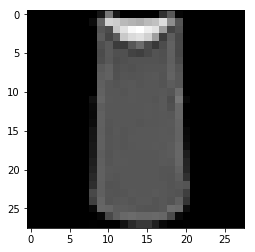

Trouser:6000


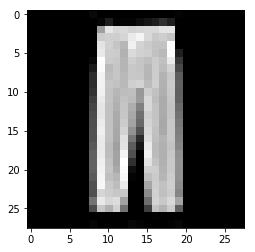

Pullover:6000


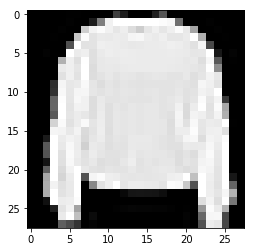

Dress:6000


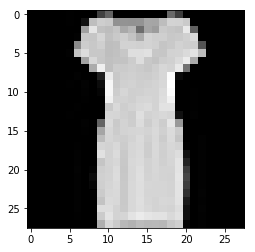

Coat:6000


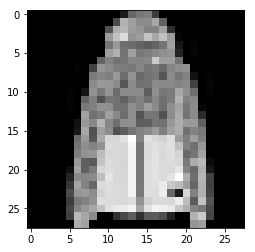

Sandal:6000


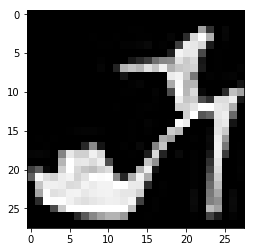

Shirt:6000


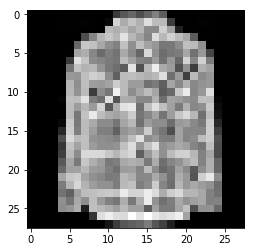

Sneaker:6000


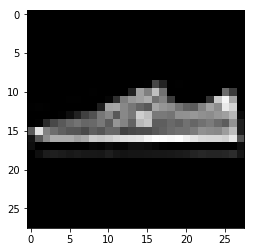

Bag:6000


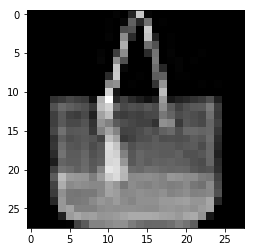

Ankle boot:6000


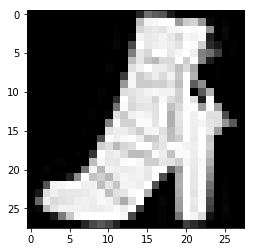

In [9]:
# plot 9 figures. I couldnt figure out how to associate each figure to their respected values
label_dict = {0: 'T-shirt/top',1: 'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5: 'Sandal',6: 'Shirt',7: 'Sneaker',8: 'Bag',9: 'Ankle boot'}
num_classes = len(label_dict)

def find_item( item, x=x_train, y=y_train ):
    return [ image.reshape(28,28) for image,label in zip(x,y) if item == label_dict[label]];


for item in label_dict.values():
    category = find_item(item);
    print( item, end=':' )
    print( len(category) )
    fig, ax = plt.subplots()
    im = ax.imshow( category[1], cmap='gray', interpolation='none')
    plt.show()


In [31]:
## Subsample the data
#m_train = 59000
#m_validation = 1000
#
#mask = list(range(m_train, m_train + m_validation))
#x_val = x_train[mask]
#y_val = y_train[mask]
#
#mask = list(range(m_train))
#x_train = x_train[mask]
#y_train = y_train[mask]
#
#mask = list(range(m_test))
#x_test = x_test[mask]
#y_test = y_test[mask]

#train_y_one_hot = sess.run(tf.one_hot(y_train, depth=10, name="One_hot_op"))
#test_y_one_hot = sess.run(tf.one_hot(y_test, depth=10, name='testonehot_op'))

In [10]:
print("X_train shape: " + str(x_train.shape))
print("y_train shape: " + str(y_train.shape))
#print("X_val shape: " + str(x_val.shape))
#print("y_val shape: " + str(x_val.shape))
print("X_test shape: " + str(x_test.shape))
print("y_test shape: " + str(y_test.shape))
print ("Number of training examples: m_train = " + str(m_train))
#print ("Number of validation examples: m_validation = " + str(m_validation))
print ("Number of testing examples: m_test = " + str(m_test))

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000


In [11]:
print("Feature Values: \nFrom " + str(np.min(x_train)) + " to " + str(np.max(x_train)))
print("Data type: " + str(x_train.dtype))
print("\nLabel Values: ")
print(set(list(y_train)))
print("Data type: " + str(y_train.dtype))

Feature Values: 
From 0 to 255
Data type: uint8

Label Values: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Data type: uint8


In [ ]:
#reshape the images 
#x_train = x_train.reshape(59000,28,28,1)
#x_test = x_test.reshape(10000,28,28,1)

def shaping(data, target):
    data = np.array(data, dtype=np.uint8)
    target = np.array(target, dtype=np.uint8)
    data = data.reshape(data.shape[0], 784)
    target = tf.one_hot(target,num_classes)
    data = data.astype('float32')
    data /= 255
    return data, target

train_data, train_target = shaping(x_train,y_train)
print("train shape: " + str(train_data.shape))
print("train_target: " + str(train_target.shape))

print("x_train: " + str(x_train.shape))
print("y_train: " + str(y_train.shape))


#  Neural Network

In [4]:
from numpy.random import uniform
import numpy as np 
DTYPE = 'float32'
EPS = np.finfo(np.double).eps



import tensorflow.compat.v1 as tf


def construct_model(n_inputs, n_hidden, n_outputs, lr):
    """Declare Parameters
    """
    # initialization from Glorot and Bengio 2010.
    W_hid = tf.Variable( uniform( low=-4 * np.sqrt(6.0 / (n_inputs + n_hidden)), \
                                  high=4 * np.sqrt(6.0 / (n_inputs + n_hidden)),\
                                  size=(n_inputs,n_hidden) \
                                ).astype('float32'), \
                         name='W_h' )
    
    b_hid = tf.Variable( np.zeros( [n_hidden], dtype=DTYPE ), \
                         name='b_h' )

    W_out = tf.Variable( uniform( low=-4 * np.sqrt(6.0 / (n_hidden + n_outputs)),\
                                  high=4 * np.sqrt(6.0 / (n_hidden + n_outputs)),\
                                  size=(n_hidden, n_outputs) \
                                ).astype('float32'), \
                         name='W_o' )
    
    b_out =  tf.Variable( tf.zeros([n_outputs]), 
                          name='b_o' )
    
    input_x = tf.placeholder( "float", [None, n_inputs] ) # create symbolic variables
    
    #The label.
    label_y = tf.placeholder( "float", [None, n_outputs] )
    
    h_in = tf.nn.bias_add(tf.matmul(input_x,W_hid),b_hid) # define net input calculation to hidden units
    h_out = tf.sigmoid(h_in)  # define squashing function (non-linearity) to hidden units
    
    o_in = tf.nn.bias_add(tf.matmul(h_out, W_out), b_out) # define net input calculation to output units
    y_pred = tf.sigmoid(o_in) # define squashing function (non-linearity) to output units
    
    cost = -tf.reduce_mean( label_y * tf.log(y_pred + EPS) + \
                            (1 - label_y) * tf.log(1 - y_pred + EPS) )
        # add EPS to prevent taking logarithm of zeron when y_pred = 0 or 1
        # if label_y and y_pred are both 0, then both top half and bottom half of the equation equal almost zero
        # if label_y and y_pred are both 1, then both top half and bottom half of the equation equal almost zero
        # if label_y and y_pred differ are 0 and 1 (respectively), then top half of the equation is zero and bottom -16
        # if label_y and y_pred differ are 1 and 0 (respectively), then top half of the equation is -16 and bottom zero

    train_op = tf.train.GradientDescentOptimizer(lr).minimize(cost)

    # generate code to compute accuracy
    # if element > 0.5 replace with 1.
    bool_vec = tf.greater(y_pred, 0.5)
    correct_prediction = tf.equal(label_y, tf.cast(bool_vec, tf.float32))
    # convert all boolean to float, to calculate percentage
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    return input_x, label_y, accuracy, cost, train_op, y_pred;


In [ ]:
input_x, label_y, accuracy, cost, train_op, y_pred = construct_model( 784, 784, 10, 0.1 )
tf.trainable_variables()

In [ ]:
import matplotlib.pyplot as plt

def train_network(epochs):
    sess = tf.Session()   # execute the tensor flow session
    
    
    
    sess.run(tf.global_variables_initializer())   # initialize all the global variables

    train_costs = np.zeros(epochs, dtype='float32');
    train_accuracies = np.zeros(epochs, dtype='float32');
    
    ### TRAINING BEGIN ###
    print ("Epoch  Cost   Accuracy")
    for i in range(epochs):
        train_cost, train_accuracy,_ = sess.run([cost, accuracy, train_op], feed_dict={input_x: train_data, label_y: train_y_one_hot})
        train_costs[i] = train_cost
        train_accuracies[i] = train_accuracy
        if i % 200 == 0:
            print ("%05d  %5.3f  %5.3f" % (i,train_cost,train_accuracy));
    print ("%05d  %5.3f  %5.3f" % (i,train_cost,train_accuracy));        
    ### TRAINING END ###
    
    return train_costs, train_accuracies, y_pred, sess;

In [ ]:
train_costs, train_accuracies, y_pred, sess = train_network(20000)

In [ ]:
# try modifying the number of processers in the middle layer, when calling out to construct model try changing the second 784. change it to the powerof 2. How it trains with the double number of hidden units. doubleit 1578 and also try half of 784
# make sure you're changing the second parameter of hidden units
# mmake sure you re-run everything everything


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.subplots_adjust(wspace =0, hspace =0.3)


# Plot the loss function and train / validation accuracies

plt.subplot(2, 1, 1)
plt.plot(train_costs)
plt.title('Loss history Train')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_accuracies)
plt.title('Classification accuracy history Train')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show();

# Plot the loss function and test accuracies

plt.subplot(2, 1, 1)
plt.plot(test_costs)
plt.title('Loss history Test')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(test_accuracies)
plt.title('Classification accuracy history Test')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show();

In [ ]:
hidden_size = 10
num_classes = 10

results = {}
best_val = -1
best_net = None

learning_rates = np.array([2.5,5,7.5,10])*1e-4
regularization_strengths = [0.25,0.5,0.75,1]

for lr in learning_rates:
    for reg in regularization_strengths:
        net = Two_layer_model(input_size, hidden_size, num_classes)
        stats = net.train(X_train, y_train, X_val, y_val,
        num_epochs=10, batch_size=1024,
        learning_rate=lr, learning_rate_decay=0.95,
        reg= reg, verbose=False)
        val_acc = (net.predict(X_val) == y_val).mean()
        if val_acc > best_val:
            best_val = val_acc
            best_net = net         
        results[(lr,reg)] = val_acc


for lr, reg in sorted(results):
    val_acc = results[(lr, reg)]
    print('lr %e reg %e val accuracy: %f' % (
                lr, reg,  val_acc))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)